In [17]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

import nltk, string
import matplotlib.pyplot as plt
import itertools

from sklearn.datasets import fetch_20newsgroups


categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers'), shuffle=True, random_state=42)


In [18]:
#Custom stop words
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(stop_words_skt))

In [19]:
#Question 1

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words=combined_stopwords,min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(dataset.data) 
print("Shape of TF-IDF matrix: ", X_train_tfidf.shape)


Shape of TF-IDF matrix:  (7882, 23498)


In [20]:
#Question 2

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

y_true = [int(i/4) for i in dataset.target]

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
print("Contingency table: ", con_mat)

Contingency table:  [[3152  751]
 [  54 3925]]


In [38]:
def plot_contingency_table(cm, title='Contingency Table', cmap=plt.cm.YlOrBr,
                           actual_class_names=['Class 1', 'Class 2'],
                           cluster_class_names=['Cluster 1', 'Cluster 2']):
    plt.gcf().clear()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks(tick_marks, actual_class_names)
    plt.yticks(tick_marks, cluster_class_names)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    plt.show()

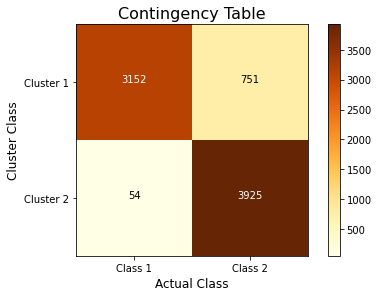

In [39]:
plot_contingency_table(con_mat)

In [23]:
#Question 3

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

Homogeneity score:  0.5726416791796606
Completeness score:  0.5874287070184784
V-measure score:  0.5799409504587489
Adjusted Rand score:  0.6331514566703629
Adjusted mutual information score:  0.5799020033415955


Text(0, 0.5, 'Total Explained Variance Ratio')

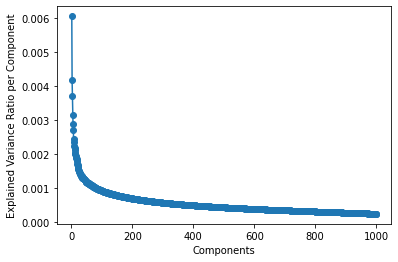

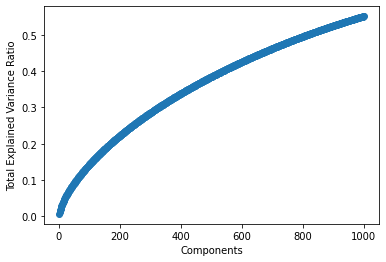

In [24]:
#Question 4 

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000,random_state=0)
X_train_svd = svd.fit_transform(X_train_tfidf)
plt.figure()
plt.plot(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True),)
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure()
plt.plot(np.arange(1000)+1,np.cumsum(sorted(svd.explained_variance_ratio_,reverse=True)))
plt.scatter(np.arange(1000)+1,np.cumsum(sorted(svd.explained_variance_ratio_,reverse=True)))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance Ratio")

SVD
[0.024355831423525265, 0.5318635371625193, 0.5285345063970099, 0.5081102414732322, 0.5532554121295006, 0.5593485213072501, 0.5766866316358341, 0.5783096811876822, 0.5871369128235766]
[0.024721996157313544, 0.549990646271486, 0.5471813148477019, 0.5335358465622074, 0.5713698038184939, 0.5763456557708879, 0.5912033854687688, 0.5925376347638949, 0.6006429168867106]
[0.02453754783130019, 0.5407752264796721, 0.5376962956964945, 0.5205127364182549, 0.5621667232909894, 0.567719896471959, 0.5838547876673039, 0.5853372100417972, 0.5938131278357017]
[0.033255388072130874, 0.5860022681355448, 0.5813489629087973, 0.5417972609936498, 0.604801005856791, 0.6139138607834312, 0.6376018710753645, 0.6400359346401595, 0.6502277843551048]
[0.024447577144322497, 0.5407324793003327, 0.5376532373980202, 0.5204677668365633, 0.5621259933687395, 0.5676797283238363, 0.5838162155124419, 0.5852987858559283, 0.593775518128383]


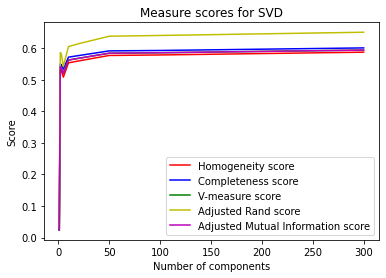

In [25]:
#Question 5

from sklearn.decomposition import NMF

r = [1,2,3,5,10,20,50,100,300]
hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(TruncatedSVD(n_components=i,random_state=0).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")
print("SVD")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)

In [26]:
def plot_histogram(title_name, ydata, x_labels = ['1', '2', '3', '5', '10', '20', '50', '100', '300'], 
                   height=range(1,10),xtickangle=0):
    plt.gcf().clear()
    fig, ax = plt.subplots()
    ax.set_xticks([i+0.25 for i in height])
    ax.set_xticklabels(x_labels, fontsize = 12)
    
    rects = plt.bar([i for i in height], ydata, 0.5, align='edge', alpha = 0.8)
    plt.xlabel('Number of Principal Components r', fontsize = 14)
    plt.ylabel('Measure Score', fontsize = 14)
    plt.title(title_name, fontsize = 18)
    plt.axis([0.5,len(x_labels)+1,0,1])
    
    plt.xticks(rotation=xtickangle)
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%.3f' % float(height), ha='center', va='bottom')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

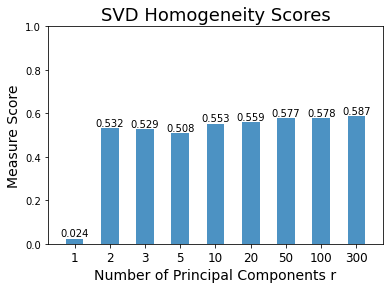

<Figure size 432x288 with 0 Axes>

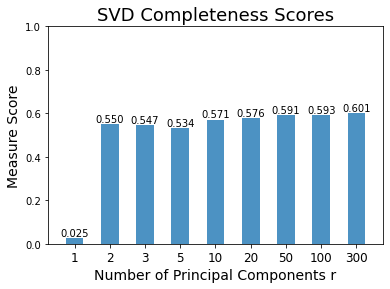

<Figure size 432x288 with 0 Axes>

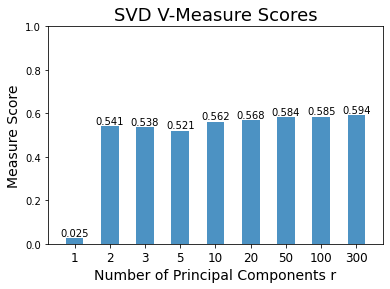

<Figure size 432x288 with 0 Axes>

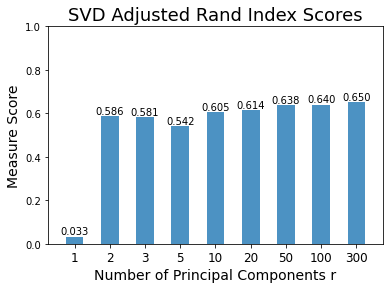

<Figure size 432x288 with 0 Axes>

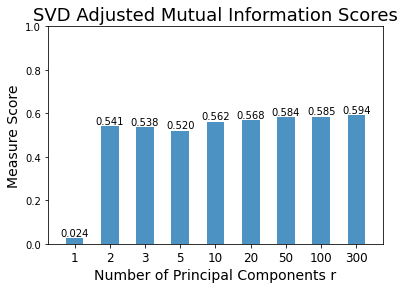

In [27]:
plot_histogram('SVD Homogeneity Scores', hom_score)
plot_histogram('SVD Completeness Scores', complt_score)
plot_histogram('SVD V-Measure Scores', v_score)
plot_histogram('SVD Adjusted Rand Index Scores', adj_rand_score)
plot_histogram('SVD Adjusted Mutual Information Scores', adj_mut_inf_score)

NMF
[0.024355831423525265, 0.5625981381480917, 0.4845630491195886, 0.18982260408438642, 0.06568597538755919, 0.06770698599877084, 0.007295751122604131, 0.041461307622996046, 0.018418844259004346]
[0.024721996157313544, 0.5625924153130488, 0.511069590482089, 0.28657265395379805, 0.18251845377179418, 0.18964922426480693, 0.11631056881859851, 0.1649349097244431, 0.08805725054317644]
[0.02453754783130019, 0.5625952767160168, 0.49746348045675953, 0.22837325315494017, 0.09660506625796159, 0.09978836227673726, 0.013730252036184986, 0.06626494533419379, 0.03046529433004099]
[0.033255388072130874, 0.6708526641377948, 0.5177847380640991, 0.11039182337424779, 0.015422042119520312, 0.01542212994495404, -6.821529449628699e-05, 0.005354315428279495, 0.0037994158438436365]
[0.024447577144322497, 0.5625552323947749, 0.49741624721967886, 0.22828824596696143, 0.09648333381301347, 0.09966680047311437, 0.013558842769859573, 0.06612813315620854, 0.030318215868571658]


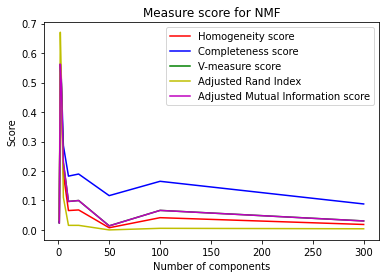

In [29]:
hom_score_nmf = []; complt_score_nmf = []; v_score_nmf = []; adj_rand_score_nmf = []; adj_mut_inf_score_nmf = []
for i in r:
    y_pred_nmf = km.fit_predict(NMF(n_components=i,init='random',random_state=0,max_iter=1000).fit_transform(X_train_tfidf))
    hom_score_nmf.append(homogeneity_score(y_true,y_pred_nmf))
    complt_score_nmf.append(completeness_score(y_true,y_pred_nmf))
    v_score_nmf.append(v_measure_score(y_true,y_pred_nmf))
    adj_rand_score_nmf.append(adjusted_rand_score(y_true,y_pred_nmf))
    adj_mut_inf_score_nmf.append(adjusted_mutual_info_score(y_true,y_pred_nmf))

fig, ax = plt.subplots()
ax.plot(r, hom_score_nmf, 'r', label='Homogeneity score')
ax.plot(r, complt_score_nmf, 'b', label='Completeness score')
ax.plot(r, v_score_nmf, 'g', label='V-measure score')
ax.plot(r, adj_rand_score_nmf,'y',label='Adjusted Rand Index')
ax.plot(r, adj_mut_inf_score_nmf,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure score for NMF")
print("NMF")
print(hom_score_nmf)
print(complt_score_nmf)
print(v_score_nmf)
print(adj_rand_score_nmf)
print(adj_mut_inf_score_nmf)

<Figure size 432x288 with 0 Axes>

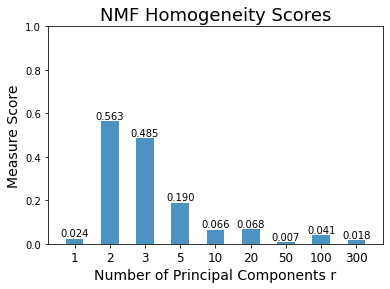

<Figure size 432x288 with 0 Axes>

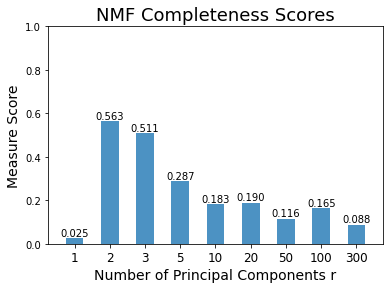

<Figure size 432x288 with 0 Axes>

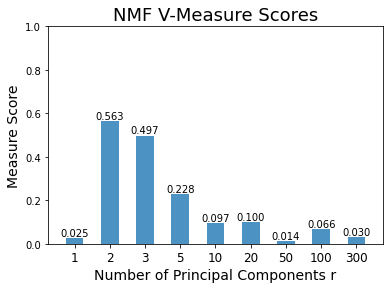

<Figure size 432x288 with 0 Axes>

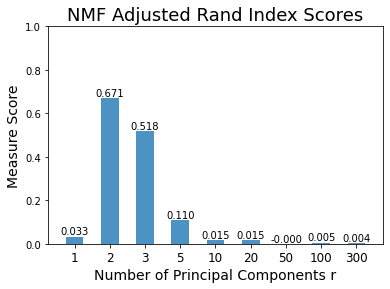

<Figure size 432x288 with 0 Axes>

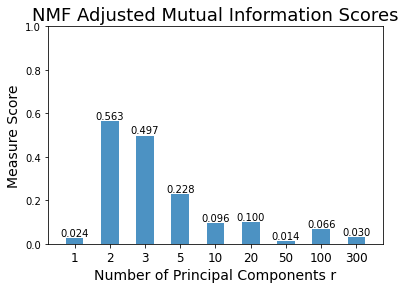

In [30]:
plot_histogram('NMF Homogeneity Scores', hom_score_nmf)
plot_histogram('NMF Completeness Scores', complt_score_nmf)
plot_histogram('NMF V-Measure Scores', v_score_nmf)
plot_histogram('NMF Adjusted Rand Index Scores', adj_rand_score_nmf)
plot_histogram('NMF Adjusted Mutual Information Scores', adj_mut_inf_score_nmf)

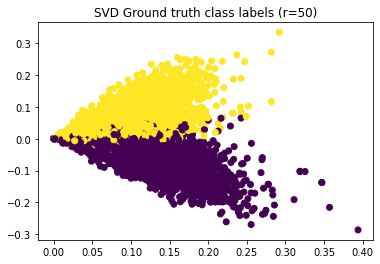

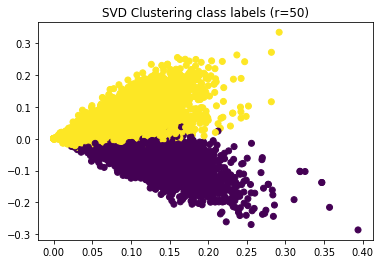

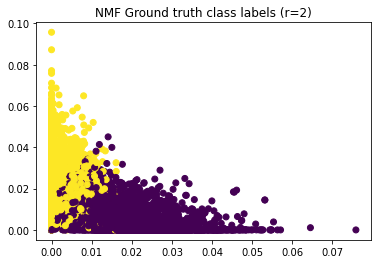

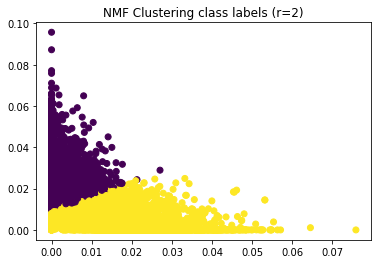

In [31]:
#Question 7

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

r_best_svd = 50
r_best_nmf = 2

reduced_data_svd = TruncatedSVD(n_components=r_best_svd,random_state=0).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=y_true,cmap='viridis')
plt.title("SVD Ground truth class labels (r=50)");

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
svd_labels = km.fit_predict(reduced_data_svd)
plt.figure()
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=svd_labels,cmap='viridis')
plt.title("SVD Clustering class labels (r=50)");

reduced_data_nmf = NMF(n_components=r_best_nmf,init='random',random_state=0).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=y_true,cmap='viridis')
plt.title("NMF Ground truth class labels (r=2)");

nmf_labels = km.fit_predict(reduced_data_nmf)
plt.figure()
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=nmf_labels,cmap='viridis')
plt.title("NMF Clustering class labels (r=2)");

In [37]:
#Question 9

dataset_20 = fetch_20newsgroups(subset='all',shuffle=True, remove=('headers', 'footers'), random_state=42)
tfidf_vect_20 = TfidfVectorizer(stop_words=combined_stopwords,min_df=3)
X_train_tfidf_20 = tfidf_vect_20.fit_transform(dataset_20.data) # making the tfidf matrix
print(X_train_tfidf_20.shape)

y_true_20 = dataset_20.target

km_20 = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y_pred_20 = km_20.fit_predict(TruncatedSVD(n_components=50,random_state=0).fit_transform(X_train_tfidf_20))
con_mat_20 = contingency_matrix(y_true_20,y_pred_20)
print("Contingency table: ")
print(con_mat_20)

print("Homogeneity score for the whole corpus: ", homogeneity_score(y_true_20,y_pred_20))
print("Completeness score for the whole corpus: ",completeness_score(y_true_20,y_pred_20))
print("V-measure score for the whole corpus: ",v_measure_score(y_true_20,y_pred_20))
print("Adjusted Rand score for the whole corpus: ",adjusted_rand_score(y_true_20,y_pred_20))
print("Adjusted mutual information score for the whole corpus: ",adjusted_mutual_info_score(y_true_20,y_pred_20))

(18846, 45338)
Contingency table: 
[[193 100 101 282   0   1   2   0  99   3   0   0   0   1   2   1   1   0
   13   0]
 [ 62 298   0   1  35   1   9   4  35 157   0   0   0 307   0   0   0  64
    0   0]
 [ 64 181   0   1 414   0   0   0  26  70   0  16   0 119   0   0   0  94
    0   0]
 [ 44 288   0   0  49   3   4   1  42 117   3 203   0  19   2   0   0 207
    0   0]
 [113 439   0   0   8   2   4   1  34 133   0 104   0  13   0   0   0 111
    0   1]
 [ 42 216   0   0  57   7   3   6  24 109   0   1   0 514   0   0   0   9
    0   0]
 [ 43 596   0   0  19   0   0  70  22  68  17  56   0   5  28   0   0  51
    0   0]
 [142 266   0   1   2   0   1   2 128  37   0   2   0   2 396   0   0   0
   11   0]
 [191 449   0   0   0   0   1   0 281  32   2   6   0   1  32   0   0   0
    0   1]
 [201 228   0   2   0   0   1   3  85  46 120   0   0   1   0   0   0   0
    0 307]
 [ 80 118   0   2   0   0   1   9  21  18 231   0   0   0   0   0   0   0
    0 519]
 [101 203   0   0   8 451   4 

In [57]:
def plot_contingency_table_20(cm, title='Contingency Table', cmap=plt.cm.YlOrBr):
    plt.gcf().clear()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Cluster Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    plt.gcf().set_size_inches(10.0,10.0)
    plt.show()

In [58]:
# reorder to maximize along diagonal
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true_20, y_pred_20)
rows, cols = linear_sum_assignment(cm, maximize=True)
new_cm = cm[rows[:,np.newaxis], cols]

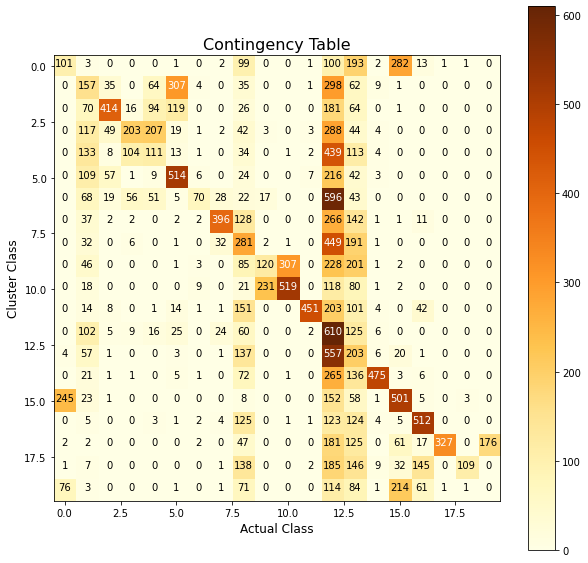

In [59]:
plot_contingency_table_20(new_cm)